In [408]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread, imread_collection, imshow, imshow_collection
from skimage.transform import resize, rotate, warp

from scipy.signal import convolve2d
from scipy.fft import fft2, fftshift

In [207]:
cat_collection = imread_collection("data/chinese-mountain-cat/*")

In [208]:
all_cats = list(cat_collection)

In [209]:
len(all_cats)

42

In [233]:
cat1 = all_cats[13]

In [234]:
red = cat1[:,:,0]
green = cat1[:,:,1]
blue = cat1[:,:,2]

In [235]:
red


array([[155, 156, 159, ..., 183, 185, 186],
       [153, 154, 156, ..., 183, 184, 185],
       [150, 150, 151, ..., 183, 184, 185],
       ...,
       [225, 211, 217, ..., 218, 217, 216],
       [237, 199, 206, ...,  47,  47,  46],
       [ 80,  70,  78, ...,  52,  52,  52]],
      shape=(3000, 4000), dtype=uint8)

In [236]:
green


array([[179, 180, 184, ..., 222, 224, 225],
       [177, 178, 181, ..., 222, 223, 224],
       [174, 174, 176, ..., 222, 223, 224],
       ...,
       [200, 186, 194, ..., 195, 194, 193],
       [210, 173, 182, ...,  33,  32,  32],
       [ 52,  44,  51, ...,  42,  42,  42]],
      shape=(3000, 4000), dtype=uint8)

In [237]:
blue

array([[213, 214, 215, ..., 253, 255, 255],
       [211, 212, 212, ..., 253, 254, 255],
       [208, 208, 207, ..., 253, 254, 255],
       ...,
       [242, 228, 240, ..., 249, 250, 247],
       [255, 220, 232, ...,  50,  51,  49],
       [100,  92, 106, ...,  41,  41,  41]],
      shape=(3000, 4000), dtype=uint8)

In [238]:
imshow


<function skimage.io._io.imshow(arr, plugin=None, **plugin_args)>

/tmp/ipykernel_102/3675278881.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(cat1)


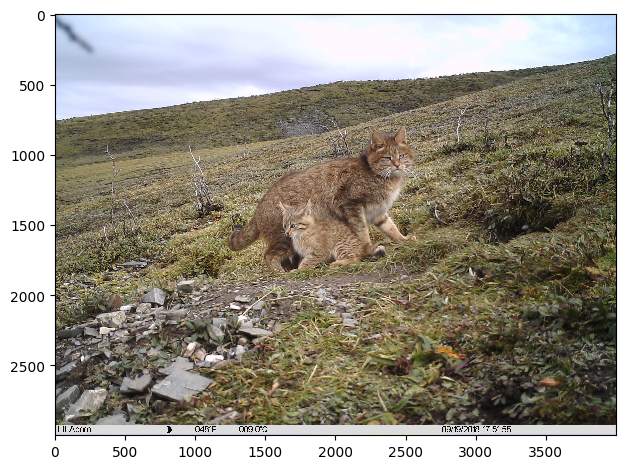

In [239]:
imshow(cat1)

/tmp/ipykernel_102/3931380868.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(red)


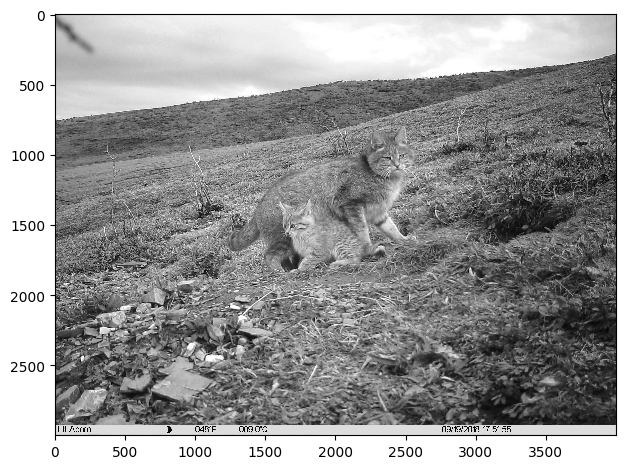

In [240]:
imshow(red)


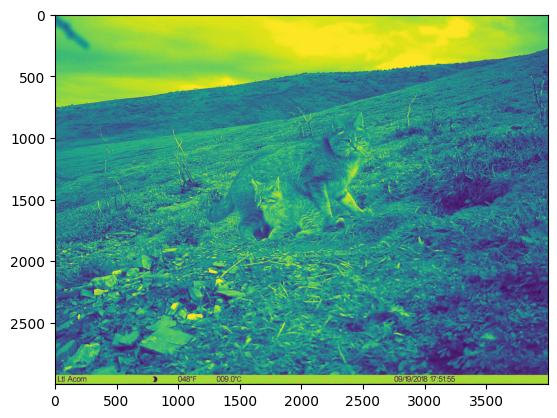

In [241]:
plt.imshow(red)

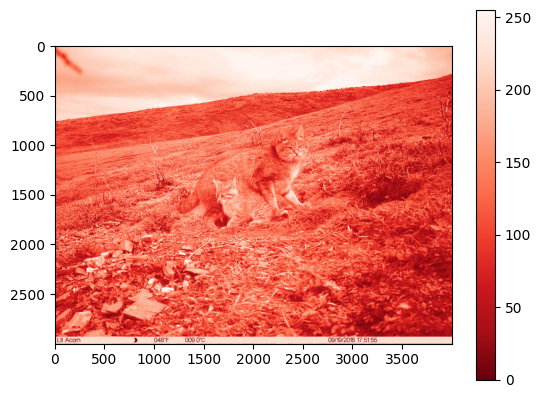

In [242]:
plt.imshow(red, cmap="Reds_r")
plt.colorbar()
plt.show()

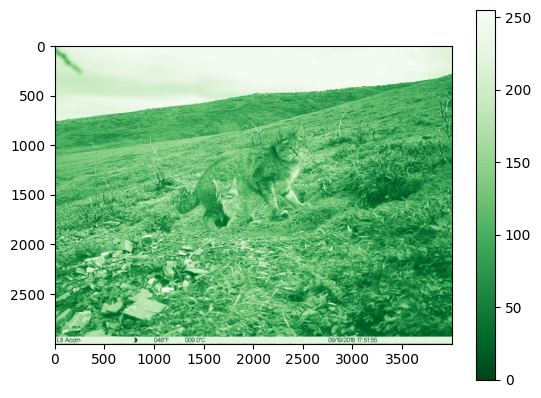

In [243]:
plt.imshow(green, cmap="Greens_r")
plt.colorbar()
plt.show()

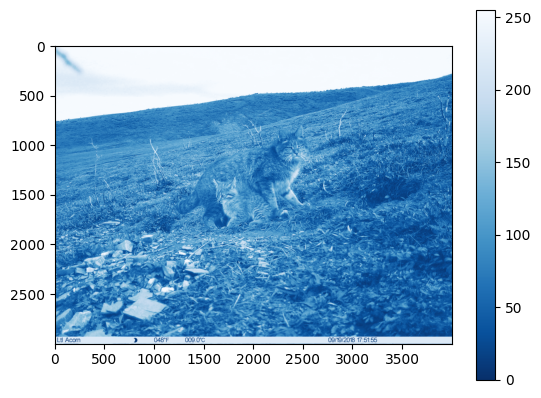

In [244]:
plt.imshow(blue, cmap="Blues_r")
plt.colorbar()
plt.show()

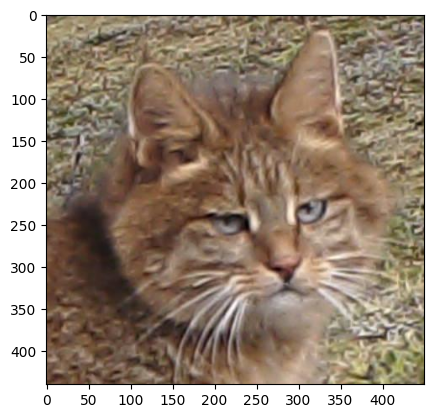

In [291]:
head = plt.imshow(cat1[780:1220, 2150:2600,:])

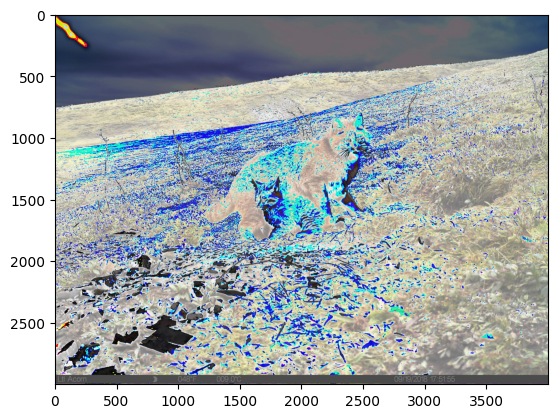

In [292]:
plt.imshow((cat1 +110))

/tmp/ipykernel_102/2888653524.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(cat1 - 110)


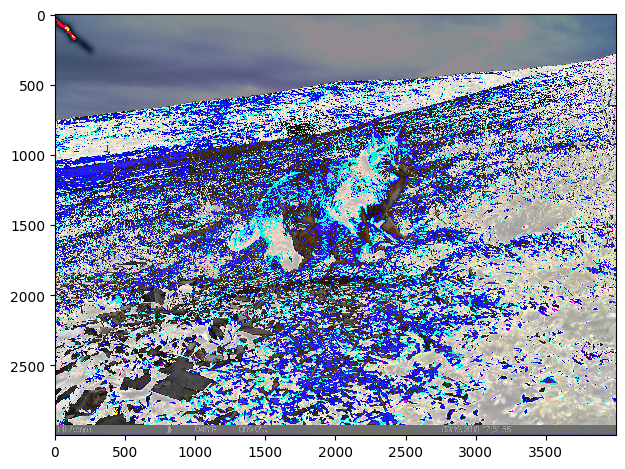

In [293]:
imshow(cat1 - 110)

(array([[ 19., 111., 396., ..., 372., 269.,  16.],
        [ 20., 105., 393., ..., 379., 269.,  14.],
        [ 19., 102., 395., ..., 380., 271.,  17.],
        ...,
        [ 84., 766., 745., ..., 274.,  75.,   1.],
        [100., 684., 788., ..., 278.,  75.,   1.],
        [115., 675., 744., ..., 282.,  75.,   1.]], shape=(4000, 10)),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 4000 BarContainer objects>)

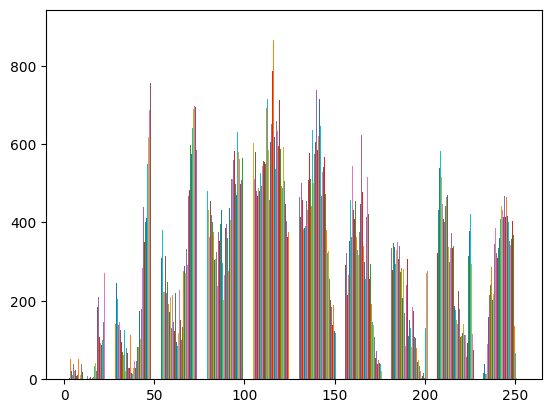

In [294]:
plt.hist(red)

In [295]:
red.shape
red.reshape(-1,1)

array([[155],
       [156],
       [159],
       ...,
       [ 52],
       [ 52],
       [ 52]], shape=(12000000, 1), dtype=uint8)

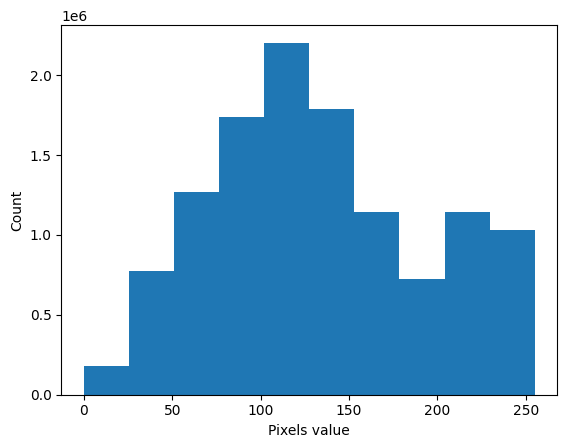

In [296]:
plt.hist(red.reshape(-1,1))

plt.xlabel("Pixels value")
plt.ylabel("Count")



plt.show()

In [297]:
red_channel = red.ravel()
green_channel = green.ravel()
blue_channel = blue.ravel()

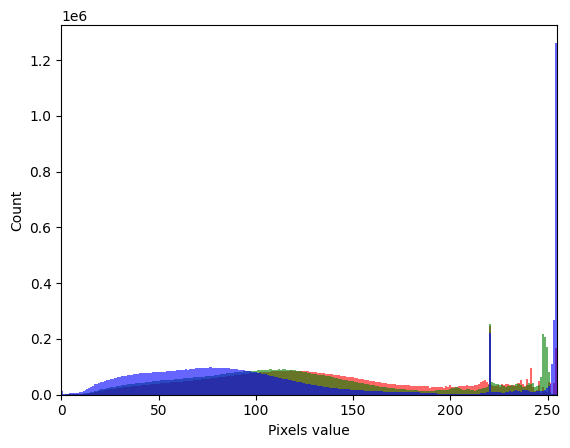

In [312]:
plt.hist(red_channel, bins= 256, color="red", alpha = 0.6)
plt.hist(green_channel, bins= 256, color="green", alpha = 0.6)
plt.hist(blue_channel, bins= 256, color="blue", alpha = 0.6)

plt.xlabel("Pixels value")
plt.ylabel("Count")

plt.xlim(0,255)
# plt.ylim(0,125000)

plt.show()

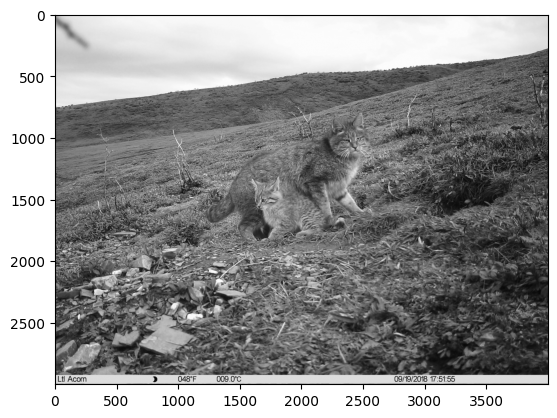

In [322]:
plt.imshow(cat1.mean(axis = 2), cmap="gray", vmin=0, vmax=256)

In [323]:
normalize_cat_image = cat1 / 256

In [324]:
normalize_cat_image

array([[[0.60546875, 0.69921875, 0.83203125],
        [0.609375  , 0.703125  , 0.8359375 ],
        [0.62109375, 0.71875   , 0.83984375],
        ...,
        [0.71484375, 0.8671875 , 0.98828125],
        [0.72265625, 0.875     , 0.99609375],
        [0.7265625 , 0.87890625, 0.99609375]],

       [[0.59765625, 0.69140625, 0.82421875],
        [0.6015625 , 0.6953125 , 0.828125  ],
        [0.609375  , 0.70703125, 0.828125  ],
        ...,
        [0.71484375, 0.8671875 , 0.98828125],
        [0.71875   , 0.87109375, 0.9921875 ],
        [0.72265625, 0.875     , 0.99609375]],

       [[0.5859375 , 0.6796875 , 0.8125    ],
        [0.5859375 , 0.6796875 , 0.8125    ],
        [0.58984375, 0.6875    , 0.80859375],
        ...,
        [0.71484375, 0.8671875 , 0.98828125],
        [0.71875   , 0.87109375, 0.9921875 ],
        [0.72265625, 0.875     , 0.99609375]],

       ...,

       [[0.87890625, 0.78125   , 0.9453125 ],
        [0.82421875, 0.7265625 , 0.890625  ],
        [0.84765625, 0

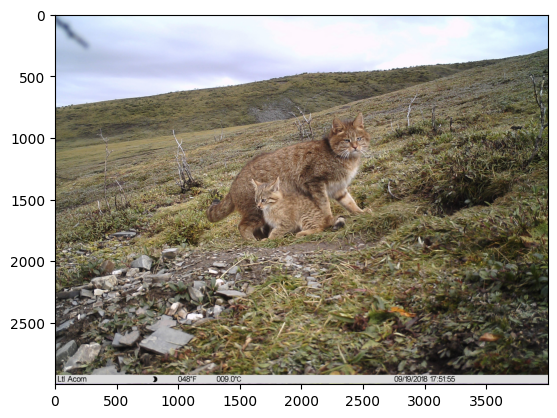

In [325]:
plt.imshow(normalize_cat_image)

In [351]:
conv_filter = np.array([
    [1,0,0,0,0,0,0],
    [0,1,0,0,0,0,0],
    [0,0,1,0,0,0,0],
    [0,0,0,1,0,0,0],
    [0,0,0,0,1,0,0],
    [0,0,0,0,0,1,0],
    [0,0,0,0,0,0,1],
])

In [352]:
result = convolve2d(cat1[:,:,0], conv_filter, mode='same')

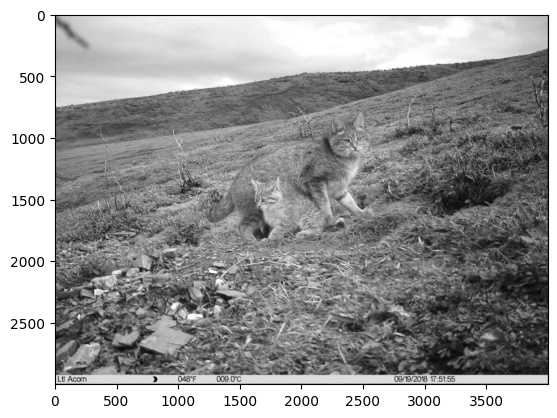

In [355]:
plt.imshow(result, cmap='gray')

In [361]:
copy_cat_image = cat1.copy()

In [369]:
copy_cat_image[copy_cat_image < 124] = 0
copy_cat_image[copy_cat_image >= 124] = 255

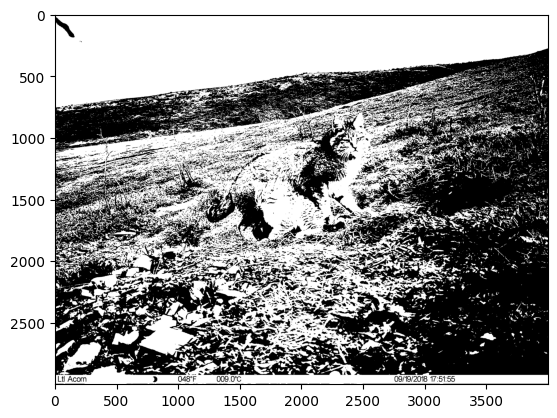

In [383]:
plt.imshow(copy_cat_image[:,:,0], cmap="gray")

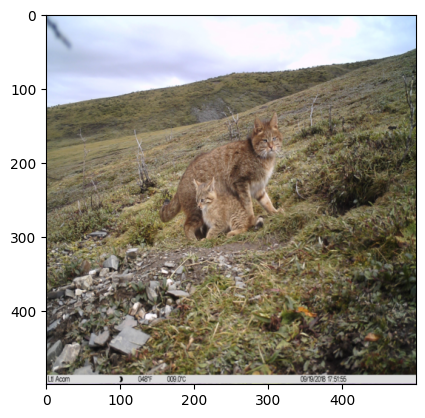

In [407]:
plt.imshow(resize(cat1,(500,500),order=3))


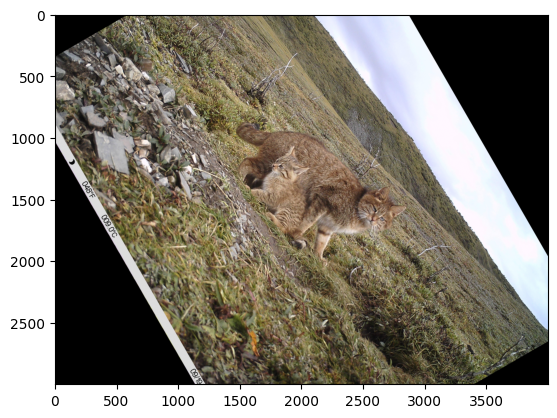

In [406]:
plt.imshow(rotate(cat1, 300))